# [CptS 215 Data Analytics Systems and Algorithms](https://github.com/gsprint23/cpts215)
[Washington State University](https://wsu.edu)

[Gina Sprint](http://eecs.wsu.edu/~gsprint/)
# Tree Visualization

Learner objectives for this lesson:
* Learn about different libraries for tree visualization
* Understand the relationship between a tree and a graph
* Produce a simple tree visualization using `networkx`


## Acknowledgments
Content used in this lesson is based upon information in the following sources:
* No sources to report

## Tree Visualization
In our last lesson, we learned how to implement a decision tree. We built a tree to classify whether a job candidate should be hired or not based on four job candidate attributes. The tree our algorithm built looked like this:

```python
tree = ['level', \
        {None: True, \
         'Senior': ('tweets', \
                    {'no': False, None: False, 'yes': True}), \
         'Junior': ('phd', \
                    {'no': True, None: True, 'yes': False}), \
         'Mid': True}]
```

Pictorially the tree looks like this:
<img src="https://raw.githubusercontent.com/gsprint23/cpts215/master/lessons/figures/job_candidate_tree.png" width="700"/>

I made the above tree diagram in Microsoft Powerpoint. Manually making a tree in Powerpoint is inefficient and not scalable. Ideally, it would be best to programmatically create visualizations of trees. These can be used for debugging our algorithm, investigating the results, and sharing the decision tree in a paper or Jupyter Notebook. 

A tree is a type of graph, which is a data structure we are going to learn about soon! Until then, you should know a little bit about graphs from your math background. A graph is a set of vertices (nodes) and a set of edges that connect the vertices. A tree is an acyclic, connected graph. This means there are no cycles in the graph and there are no unreachable vertices. There are several python libraries that have support for visualizing graphs, such as:
* [pygraphviz](https://pygraphviz.github.io/)
* [networkx](https://networkx.github.io/) (uses Matplotlib and/or graphviz via pygraphviz or pydot)
* [plotly](https://plot.ly/python/)

Currently, pygraphviz is the best option but the most difficult to install. At the time of writing, pygraphviz does not have support (official or unofficial) for Python 3.5. So, instead we will walk through an example using networkx.

## networkx
[networkx](https://networkx.github.io/) is a Python language software package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks. We will use networkx's `DiGraph` (directed graph) object to store nodes and edges between those nodes. For a decision tree, the nodes will be either decision or leaf nodes, and the edges will be attribute values that route examples from one node to the next.

(-0.20000000000000001,
 1.2000000000000002,
 -0.10000000000000001,
 0.90000000000000002)

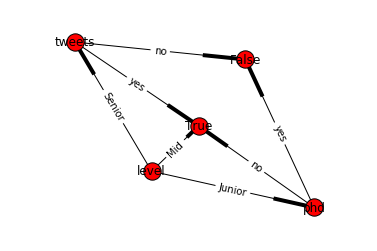

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx

    
def build_graph(tree, G, parent=None, value=None):
    '''
    tree is the decision tree format used by Joel Grus
    in Data Science from Scratch:
    leaf node: True/False
    decision node: tuple of (attribute, subtree_dict)
    '''
    if tree in [True, False]:
        G.add_node(tree) # add leaf node
        G.add_edge(parent, tree, label=value)
    else:
        attribute, subtree_dict = tree
        attribute = str(attribute)
        G.add_node(attribute) # add attribute node

        if parent is not None:
            G.add_edge(parent, attribute, label=value)

        for attribute_value, subtree in subtree_dict.items():
            attribute_value = str(attribute_value)
            build_graph(subtree, G, attribute, attribute_value)

# tree built previously for candidate hire classification problem
tree = ('level', \
        {None: True, \
         'Senior': ('tweets', \
                    {'no': False, None: False, 'yes': True}), \
         'Junior': ('phd', \
                    {'no': True, None: True, 'yes': False}), \
         'Mid': True})

G = nx.DiGraph()
build_graph(tree, G)
pos = nx.spring_layout(G)
# draw nodes and edges
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)

# add node and edge labels
labels = {node:str(node) for i, node in enumerate(G.nodes())}
elabels = {edge:G[edge[0]][edge[1]]["label"] for i, edge in enumerate(G.edges())}
nx.draw_networkx_labels(G, pos, labels)
nx.draw_networkx_edge_labels(G, pos, edge_labels=elabels)
plt.axis('off')

What do you notice about this visualization? 
1. The data is visualized as a *graph*, not a *tree*. For a tree visualization we would expect a hierarchy with the root node at the top, and each subsequent level of the tree spaced below. 
1. Notice how there are only two `True`/`False` nodes. A networkx graph has unique nodes, so we cannot add multiple `True` or `False` nodes to represent leaf nodes.
1. What happened to our `None` attribute value off of the root node level? For example, `level` should have four children, Senior, Junior, Mid, and `None`. Like with nodes, only unique edges are stored in the graph. Edge (level -> `False`) exists for attribute value Mid and `None`.

To address (1), we will need a tree-specific layout for our graph (instead of the spring layout). To address (2) and (3), we can create a new, unique node every time we need a `True`/`False` leaf node. I'll use a [generator](https://wiki.python.org/moin/Generators) function, `get_number()`, to do this.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx

def get_number():
    '''
    
    '''
    num = 0
    while True:
        yield num
        num += 1

def build_graph(tree, G, parent=None, value=None, gen=get_number()):
    '''
    
    '''
    if tree in [True, False]:
        unique_label = str(tree) + str(next(gen))
        G.add_node(unique_label) # add leaf node
        G.add_edge(parent, unique_label, label=value)
    else:
        attribute, subtree_dict = tree
        attribute = str(attribute)
        G.add_node(attribute) # add attribute node

        if parent is not None:
            G.add_edge(parent, attribute, label=value)

        for attribute_value, subtree in subtree_dict.items():
            attribute_value = str(attribute_value)
            build_graph(subtree, G, attribute, attribute_value, gen)

tree = ['level', \
        {None: True, \
         'Senior': ('tweets', \
                    {'no': False, None: False, 'yes': True}), \
         'Junior': ('phd', \
                    {'no': True, None: True, 'yes': False}), \
         'Mid': True}]

G = nx.DiGraph()
build_graph(tree, G)
pos = nx.spring_layout(G)
# draw nodes and edges
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)

# add node and edge labels
labels = {node:str(node) for i, node in enumerate(G.nodes())}
elabels = {edge:G[edge[0]][edge[1]]["label"] for i, edge in enumerate(G.edges())}
nx.draw_networkx_labels(G, pos, labels)
nx.draw_networkx_edge_labels(G, pos, edge_labels=elabels)
plt.axis('off')

Now we have the desired leaf nodes, but the graph is even more difficult to read! For the next iteration of our tree, will use the [`pydot`](https://pypi.python.org/pypi/pydot) module to visualize a tree, save the visualization as an image, and then open the image in Jupyter Notebook. 

In [ ]:
G = nx.DiGraph()
build_graph(tree, G)
p=nx.drawing.nx_pydot.to_pydot(G) # will need to install pydot and pydotplus
p.write_png(r'figures\example.png')
from IPython.display import Image
Image(r"figures\example.png")

Now, we have a readable tree! When pygraphviz adds support for 64 bit Python 3.5, we will have a more elegant (and beautiful) way to do this. I also plan to around with plotly to make interactive tree visualizations, and I encourage you to do so as well! 

## "Real" Decision Tree Visualization
In real data scientist contexts, you likely won't be using our greedy ID3 decision tree algorithm to build your trees. You will likely be using a well-tested, highly-efficient library like [scikit-learn]() or [WEKA](). Scikit-learn has built-in functionality ([sklearn.tree.export_graphviz](http://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html)) to export a decision tree model to a graphviz visualization. For this, you do not need pygraphviz (the graphviz Python bindings), so this is straightforward to install and use (in fact, this is what our `to_pydot()` code above is doing behind the scenes). 